<a href="https://colab.research.google.com/github/skarot/DeepLearning/blob/main/GPUPerformanceBenchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU bench-marking with image classification with ANN

## Configure GPU for tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device_name = tf.config.experimental.list_physical_devices()

In [4]:
device_name

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

## LOad data

In [6]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## Analyse Data

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Show Data

In [11]:
def plot_sample(index):
  plt.figure(figsize=(10,2))
  plt.imshow(X_train[index])

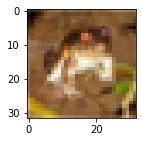

In [12]:
plot_sample(0)

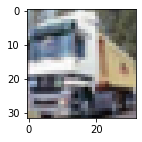

In [13]:
plot_sample(1)

In [14]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
y_train[3][0]

4

In [16]:
classes[y_train[3][0]]

'deer'

## Scaling

In [17]:
X_train_scaled = X_train/255

In [18]:
X_test_scaled = X_test/255

## One hot encoding data to convert catagorical data to binary integers

It converts the values like 1,2, 3,4, 5 for num_classes 5 as 10000,01000,00100,00010,00001. Basically 1 against the original value and 0 for all other values in the num_class range. Here our num_class is 10 as we have 10 categories.

In [19]:
y_train_onehotencoded = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')

In [20]:
y_test_onehotencoded = keras.utils.to_categorical(y_test, num_classes  =10,dtype = 'float32')

In [21]:
y_test_onehotencoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## Model Creation

input layer will take the flattened shape of single sample of X_train, hence 32X32X3 = 3072 The dense units can be random but ususally close to the the input shape (3072), hence 3000. Relu works as a better activation fucntionfor any hidden layer, hence relu for middle 2 layers. Final output layer, we must reduce the output as a classification problem so sigmoid.

In [22]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (32,32,3)),
                          keras.layers.Dense(3000,activation = 'relu'),
                          keras.layers.Dense(3000,activation = 'relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])

Since the dataset is relatively huge, we should choose stochastical gradient descent, which chooses random samples in each epoch for training, in contrast to others which takes all the samples for each epoch, causing slow training.

For loss, we are using 'categorical_cross entropy' since out y_train_onehotencoded is one hot encoded, of form [[0001],[01000]....so on]. If we have descret values for y_train, like [[2],[4],[3]...so on], we use 'sparse_categorical_crossentropy' as loss.

In [23]:
model.compile(optimizer = 'SGD',loss='categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.fit(X_train_scaled, y_train_onehotencoded, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8070 - accuracy: 0.3568
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6188 - accuracy: 0.4295
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5366 - accuracy: 0.4577
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4745 - accuracy: 0.4787
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4247 - accuracy: 0.4988
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3820 - accuracy: 0.5133
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3434 - accuracy: 0.5272
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3090 - accuracy: 0.5420
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2744 - accuracy: 0.5543
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.244

As we see the accuracy is low, lets increase the epoch to 50

In [25]:
model.fit(X_train_scaled, y_train_onehotencoded, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2111 - accuracy: 0.5756
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1820 - accuracy: 0.5867
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1545 - accuracy: 0.5997
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1274 - accuracy: 0.6071
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0997 - accuracy: 0.6181
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0696 - accuracy: 0.6289
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0436 - accuracy: 0.6374
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0173 - accuracy: 0.6469
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9907 - accuracy: 0.6555
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.963

## Test the model prediction

Original category

In [26]:
# Truth Value = 'cat'
classes[y_test[0][0]]

'cat'

Model Prediction

In [27]:
y_hat = model.predict(X_test_scaled)

In [28]:
y_hat

array([[5.83442032e-01, 5.35560310e-01, 7.30266154e-01, ...,
        5.82007633e-04, 8.02780271e-01, 7.32946336e-01],
       [9.75783765e-01, 9.96936440e-01, 2.45662555e-01, ...,
        6.54079318e-01, 9.99992609e-01, 9.99340117e-01],
       [9.96547401e-01, 9.44021404e-01, 1.14402823e-01, ...,
        9.95564759e-01, 9.93769467e-01, 9.91922259e-01],
       ...,
       [4.37145561e-01, 1.21736981e-03, 9.90808964e-01, ...,
        8.00197959e-01, 4.99910146e-01, 2.30001286e-01],
       [3.03078443e-01, 1.04148805e-01, 3.87672633e-01, ...,
        4.62694347e-01, 3.19240689e-02, 7.93668255e-02],
       [1.00298204e-01, 2.26311192e-01, 7.09405839e-01, ...,
        9.99813735e-01, 8.53809938e-02, 2.43747458e-01]], dtype=float32)

In [29]:
y_hat[0]

array([5.8344203e-01, 5.3556031e-01, 7.3026615e-01, 9.9961156e-01,
       6.6677511e-01, 6.8900585e-01, 3.1323275e-03, 5.8200763e-04,
       8.0278027e-01, 7.3294634e-01], dtype=float32)

In [30]:
# Predicted value
classes[(np.argmax(y_hat[0]))]
# Truth Value same as predicted value 'cat'

'cat'

In [31]:
classes[y_test[3][0]]

'airplane'

In [32]:
classes[np.argmax(y_hat[3])]

'airplane'

In [33]:
classes[y_test[4][0]]

'frog'

In [34]:
classes[np.argmax(y_hat[4])]

'deer'

In [35]:
classes[y_test[6][0]]

'automobile'

In [36]:
classes[np.argmax(y_hat[6])]

'automobile'

## Model evaluation

In [37]:
loss, accuracy = model.evaluate(X_test_scaled,y_test_onehotencoded)

313/313 [==============================] - 1s 3ms/step - loss: 1.7528 - accuracy: 0.5660


## Performance test CPU vs GPU

In [38]:
def get_model():
  model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (32,32,3)),
                          keras.layers.Dense(3000,activation = 'relu'),
                          keras.layers.Dense(3000,activation = 'relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])
  model.compile(optimizer = 'SGD',loss ='categorical_crossentropy' ,metrics = ['accuracy'])
  return model

In [39]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_onehotencoded, epochs = 1)


1563/1563 [==============================] - 138s 88ms/step - loss: 1.8084 - accuracy: 0.3570
1 loop, best of 1: 2min 22s per loop


In [40]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model = get_model()
  gpu_model.fit(X_train_scaled, y_train_onehotencoded, epochs = 1)


1563/1563 [==============================] - 7s 4ms/step - loss: 1.8055 - accuracy: 0.3586
1 loop, best of 1: 11.4 s per loop


Final Review of performance



---
Epoch  | CPU       |    GPU    |        
-------|-----------|-----------|
10     | 2min 22s  | 23min 22s |
1      | 1min 8s   | 11sec     |